# Importing Libraries and Reading Data

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


data = pd.read_csv("dataset.csv", encoding="latin-1")

# Data Preperation
In this step, we will examine datatypes of the all columns. Then we will change string data values like 'Yes' and 'No' to proper numeric values like 0s and 1s. After that, we will seperate all columns from Churn column. Churn column is going to be named as dataframe_y and our train values is going to be named as dataframe_x. We will also fix NULL values and drop unwanted data.

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [71]:
data.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3043-TYBNO,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [72]:
for item in data.columns:
    print(item)
    print(data[item].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [73]:
for item in data.columns:
    try:
        data[item] = data[item].str.lower()
    except:
        print(item, "couldn't convert")
data.head()

SeniorCitizen couldn't convert
tenure couldn't convert
MonthlyCharges couldn't convert


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,yes,no,1,no,no phone service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one year,no,mailed check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no phone service,dsl,yes,...,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber optic,no,...,no,no,no,no,month-to-month,yes,electronic check,70.70,151.65,yes


In [74]:
#convert all 'yes' and 'no' values to 0's and 1's

columns_to_convert = ['Partner',                      
                      'Dependents', 
                      'PhoneService', 
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    data[item].replace(to_replace='yes', value=1, inplace=True)
    data[item].replace(to_replace='no',  value=0, inplace=True)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,1,0,1,0,no phone service,dsl,no,...,no,no,no,no,month-to-month,1,electronic check,29.85,29.85,0
1,5575-gnvde,male,0,0,0,34,1,no,dsl,yes,...,yes,no,no,no,one year,0,mailed check,56.95,1889.5,0
2,3668-qpybk,male,0,0,0,2,1,no,dsl,yes,...,no,no,no,no,month-to-month,1,mailed check,53.85,108.15,1
3,7795-cfocw,male,0,0,0,45,0,no phone service,dsl,yes,...,yes,yes,no,no,one year,0,bank transfer (automatic),42.30,1840.75,0
4,9237-hqitu,female,0,0,0,2,1,no,fiber optic,no,...,no,no,no,no,month-to-month,1,electronic check,70.70,151.65,1


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [76]:
#Change 'TotalCharges' column datatype from object to float

data['TotalCharges'] = data['TotalCharges'].replace(r'\s+', np.nan, regex=True)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])


In [77]:
#Check for NULLs

data.isnull().sum(axis = 0)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [78]:
#Fill NULL values with 0s

data = data.fillna(value=0)

In [79]:
#Balance labels

churners_number = len(data[data['Churn'] == 1])
print("Number of churners", churners_number)

churners = (data[data['Churn'] == 1])

non_churners = data[data['Churn'] == 0].sample(n=churners_number)
print("Number of non-churners", len(non_churners))
data2 = churners.append(non_churners)

Number of churners 1869
Number of non-churners 1869


# Feature Engineering
In this step, we need to create seperate columns for the columns has more than binary values unlike just 'Yes' and 'No'.
For example, we created 4 different columns for each payment method which contain 0s and 1s. So we can manage those values with machine learning algorithms.

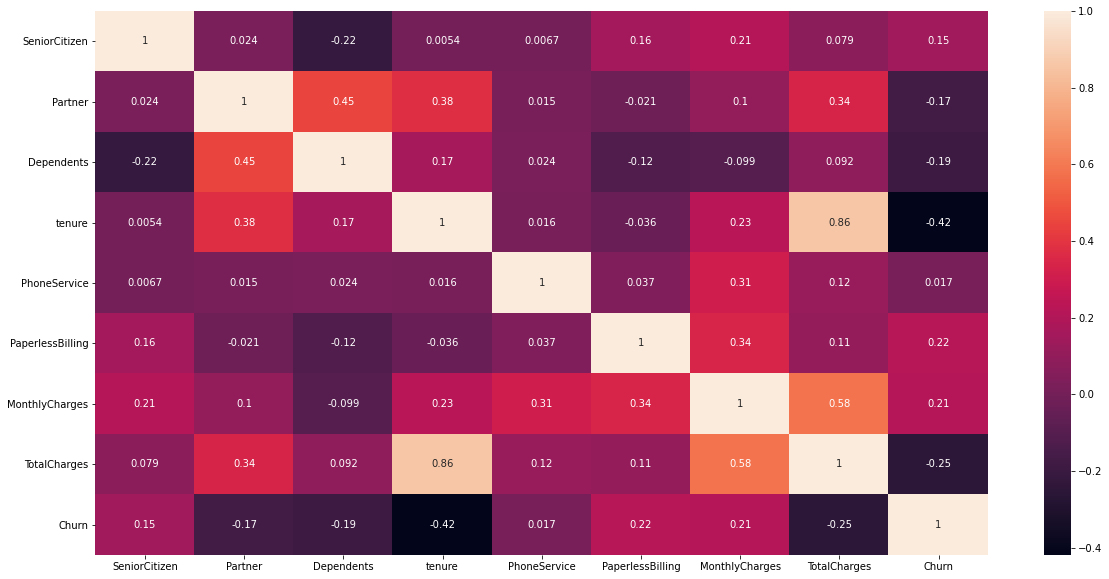

In [80]:
#correlation map function
def show_correlations(dataframe, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = dataframe.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

correlation_data = show_correlations(data2,show_chart=True)

In [81]:
customer_id = data2['customerID'] # Store this as customer_id variable
del data2['customerID'] # Don't need in machine learning

In [82]:
data2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,male,0,0,0,2,1,no,dsl,yes,yes,no,no,no,no,month-to-month,1,mailed check,53.85,108.15,1
4,female,0,0,0,2,1,no,fiber optic,no,no,no,no,no,no,month-to-month,1,electronic check,70.70,151.65,1
5,female,0,0,0,8,1,yes,fiber optic,no,no,yes,no,yes,yes,month-to-month,1,electronic check,99.65,820.50,1
8,female,0,1,0,28,1,yes,fiber optic,no,no,yes,yes,yes,yes,month-to-month,1,electronic check,104.80,3046.05,1
13,male,0,0,0,49,1,yes,fiber optic,no,yes,yes,no,yes,yes,month-to-month,1,bank transfer (automatic),103.70,5036.30,1


In [83]:
#convert categorical data to binary

x = pd.get_dummies(data2)
x.fillna(value=0, inplace=True)
x.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_female,...,StreamingMovies_no,StreamingMovies_no internet service,StreamingMovies_yes,Contract_month-to-month,Contract_one year,Contract_two year,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
2,0,0,0,2,1,1,53.85,108.15,1,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,2,1,1,70.70,151.65,1,1,...,1,0,0,1,0,0,0,0,1,0
5,0,0,0,8,1,1,99.65,820.50,1,1,...,0,0,1,1,0,0,0,0,1,0
8,0,1,0,28,1,1,104.80,3046.05,1,1,...,0,0,1,1,0,0,0,0,1,0
13,0,0,0,49,1,1,103.70,5036.30,1,0,...,0,0,1,1,0,0,1,0,0,0


In [84]:
show_correlations(x, show_chart=False)["Churn"].sort_values(ascending=False)

Churn                                      1.000000
Contract_month-to-month                    0.491232
TechSupport_no                             0.392935
OnlineSecurity_no                          0.379882
InternetService_fiber optic                0.341202
PaymentMethod_electronic check             0.319173
OnlineBackup_no                            0.316214
DeviceProtection_no                        0.280930
PaperlessBilling                           0.223738
MonthlyCharges                             0.210980
StreamingMovies_no                         0.153650
SeniorCitizen                              0.151321
StreamingTV_no                             0.149686
StreamingTV_yes                            0.052769
StreamingMovies_yes                        0.048890
MultipleLines_yes                          0.036137
PhoneService                               0.017251
gender_female                              0.016052
gender_male                               -0.016052
MultipleLine

<Figure size 1440x720 with 0 Axes>

In [85]:
y = x['Churn'] # Remove the label before training the model
del x['Churn']

In [86]:
dataframe_x = pd.DataFrame(x)
dataframe_y = pd.DataFrame(y)
x.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_female,gender_male,...,StreamingMovies_no,StreamingMovies_no internet service,StreamingMovies_yes,Contract_month-to-month,Contract_one year,Contract_two year,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
2,0,0,0,2,1,1,53.85,108.15,0,1,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,2,1,1,70.70,151.65,1,0,...,1,0,0,1,0,0,0,0,1,0
5,0,0,0,8,1,1,99.65,820.50,1,0,...,0,0,1,1,0,0,0,0,1,0
8,0,1,0,28,1,1,104.80,3046.05,1,0,...,0,0,1,1,0,0,0,0,1,0
13,0,0,0,49,1,1,103.70,5036.30,0,1,...,0,0,1,1,0,0,1,0,0,0


In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Exploratory Data Analysis
Visualization of Features

2       1
4       1
5       1
8       1
13      1
       ..
5259    0
46      0
4210    0
415     0
6406    0
Name: Churn, Length: 3738, dtype: int64


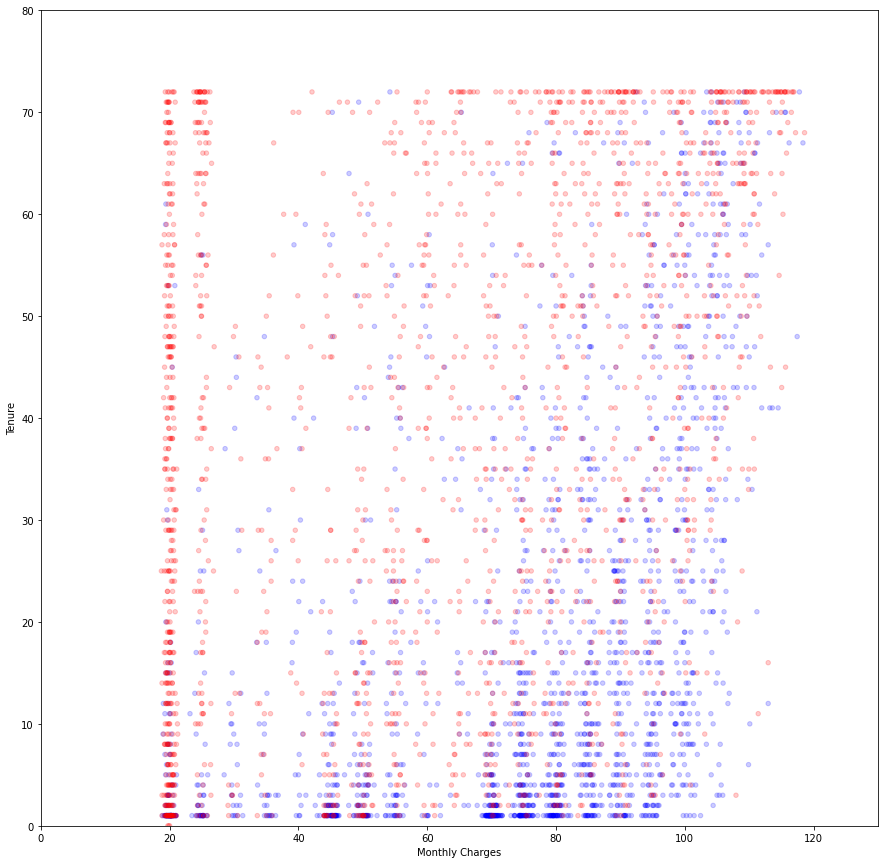

In [88]:
classes = y
print(y)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoder = dataframe_y.apply(le.fit_transform)
color = []
for l in encoder.values:
    if l == 0:
        color.append("red")
    else:
        color.append("blue")            

plt.figure(figsize=(15,15))
plt.scatter(dataframe_x['MonthlyCharges'],dataframe_x['tenure'], color=color, marker='o', alpha=0.2,s=20)
axes = plt.gca()
axes.set_xlim([0,130])
axes.set_ylim([0,80])
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x17E33BC8>,
      dtype=object)

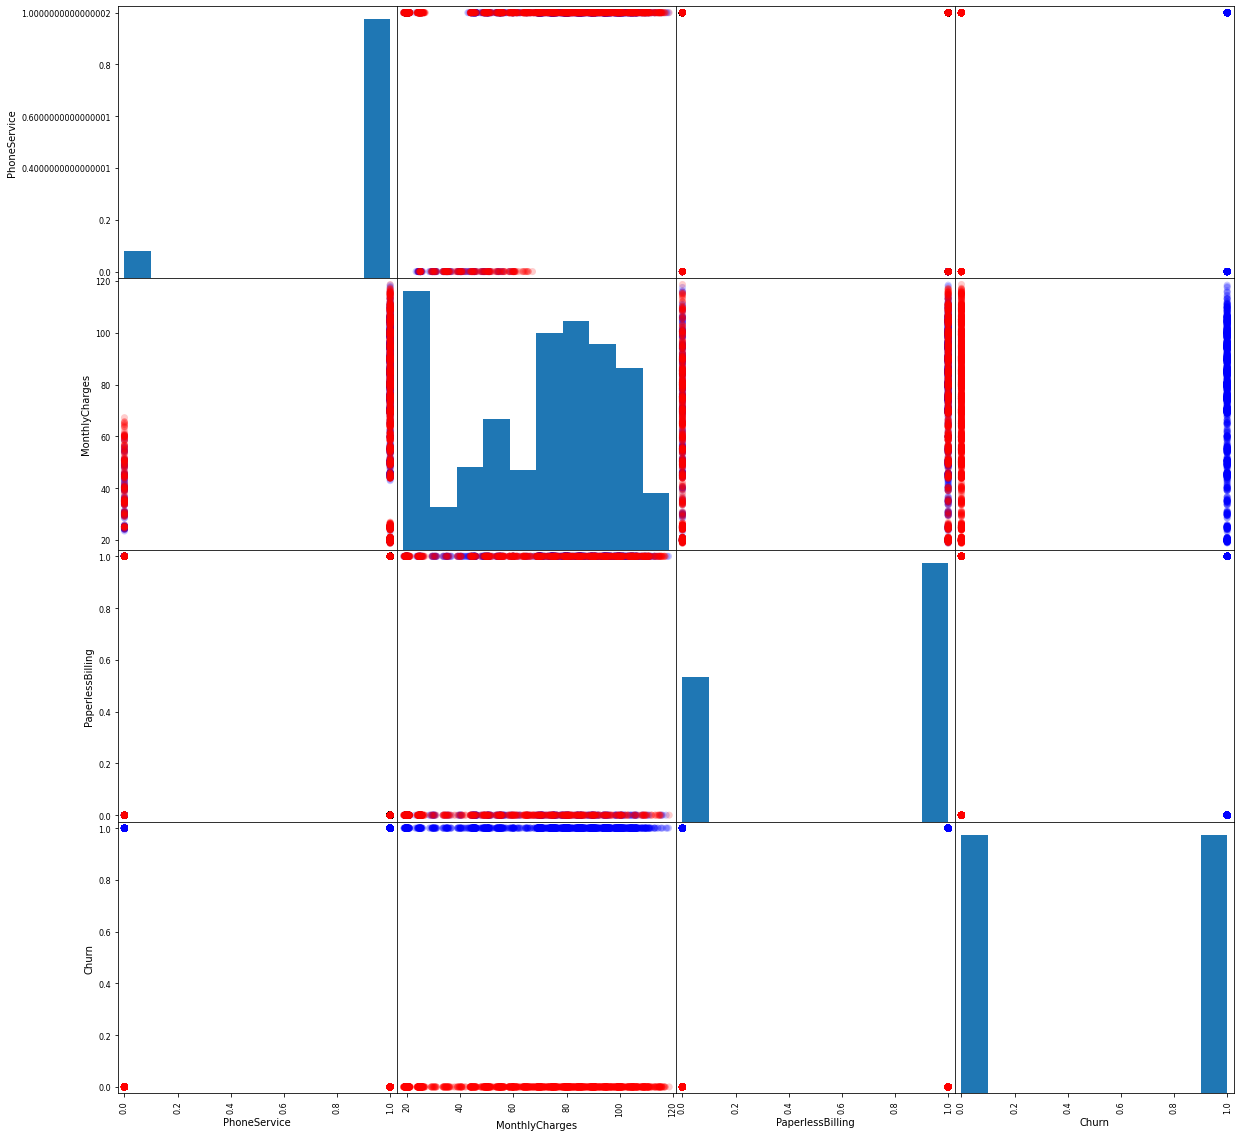

In [89]:
pd.plotting.scatter_matrix(pd.concat([dataframe_x['PhoneService'], dataframe_x['MonthlyCharges'], dataframe_x['PaperlessBilling'], dataframe_y],axis=1), alpha=0.2, figsize = [20,20] , color=color, marker='o' , s=50)


# Model Building
Kth Nearest Neighbor, Random Forest and Gaussian Naive Bayes algorithms

KNeighborsClassifier


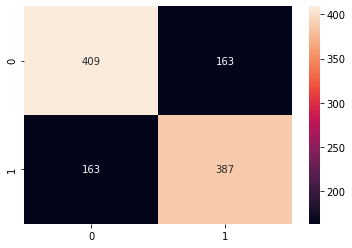

Accuracy : 0.7094474153297683
True positive: 387
True negative: 409
False positive: 163
False negative: 163


In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 13, metric = 'minkowski')
knn.fit(x_train, y_train)

from sklearn.metrics import confusion_matrix
y_pred_knn = knn.predict(x_test)
y_pred_ham = [0 for i in range(len(y_test))]

cm = confusion_matrix(y_test, y_pred_knn)
print("KNeighborsClassifier")
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()
print("Accuracy : " + str((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
print("True positive: " + str(tp))
print("True negative: " + str(tn))
print("False positive: " + str(fp))
print("False negative: " + str(fn))

In [91]:
from sklearn import metrics
print("Accuracy: " + str(metrics.accuracy_score(y_test,y_pred_knn)))
print("Precision churn: " + str(metrics.precision_score(y_test,y_pred_knn)))
print("Precision no-churn: " + str(metrics.precision_score(y_test,y_pred_knn,pos_label=0)))
print("Recall: " + str(metrics.recall_score(y_test,y_pred_knn)))
print("F1 score: " + str(metrics.f1_score(y_test,y_pred_knn)))
print("AUC score: " + str(metrics.roc_auc_score(y_test,y_pred_knn)))
print("\n")
print(metrics.classification_report(y_test,y_pred_knn))

Accuracy: 0.7094474153297683
Precision churn: 0.7036363636363636
Precision no-churn: 0.715034965034965
Recall: 0.7036363636363636
F1 score: 0.7036363636363636
AUC score: 0.7093356643356643


              precision    recall  f1-score   support

           0       0.72      0.72      0.72       572
           1       0.70      0.70      0.70       550

    accuracy                           0.71      1122
   macro avg       0.71      0.71      0.71      1122
weighted avg       0.71      0.71      0.71      1122



RandomForest


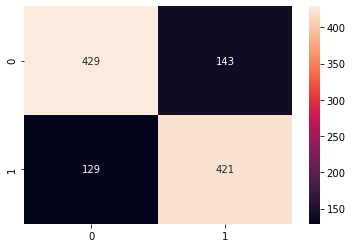

Accuracy : 0.7575757575757576
True positive: 421
True negative: 429
False positive: 143
False negative: 129


In [92]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50) 
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)

cm = confusion_matrix(y_test, y_pred_rfc)
print("RandomForest")
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()
print("Accuracy : " + str((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rfc).ravel()
print("True positive: " + str(tp))
print("True negative: " + str(tn))
print("False positive: " + str(fp))
print("False negative: " + str(fn))

In [93]:
print("Accuracy: " + str(metrics.accuracy_score(y_test,y_pred_rfc)))
print("Precision spam: " + str(metrics.precision_score(y_test,y_pred_rfc)))
print("Precision ham: " + str(metrics.precision_score(y_test,y_pred_rfc,pos_label=0)))
print("Recall: " + str(metrics.recall_score(y_test,y_pred_rfc)))
print("F1 score: " + str(metrics.f1_score(y_test,y_pred_rfc)))
print("AUC score: " + str(metrics.roc_auc_score(y_test,y_pred_rfc)))
print("\n")
print(metrics.classification_report(y_test,y_pred_rfc))

Accuracy: 0.7575757575757576
Precision spam: 0.7464539007092199
Precision ham: 0.7688172043010753
Recall: 0.7654545454545455
F1 score: 0.7558348294434469
AUC score: 0.7577272727272728


              precision    recall  f1-score   support

           0       0.77      0.75      0.76       572
           1       0.75      0.77      0.76       550

    accuracy                           0.76      1122
   macro avg       0.76      0.76      0.76      1122
weighted avg       0.76      0.76      0.76      1122



GaussianNB


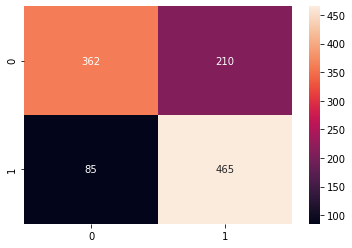

Accuracy : 0.7370766488413547
True positive: 465
True negative: 362
False positive: 210
False negative: 85


In [94]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred_gnb = gnb.predict(x_test)
cm = confusion_matrix(y_test, y_pred_gnb)
print("GaussianNB")
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()
print("Accuracy : " + str((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_gnb).ravel()
print("True positive: " + str(tp))
print("True negative: " + str(tn))
print("False positive: " + str(fp))
print("False negative: " + str(fn))

In [95]:
print("Accuracy: " + str(metrics.accuracy_score(y_test,y_pred_gnb)))
print("Precision spam: " + str(metrics.precision_score(y_test,y_pred_gnb)))
print("Precision ham: " + str(metrics.precision_score(y_test,y_pred_gnb,pos_label=0)))
print("Recall: " + str(metrics.recall_score(y_test,y_pred_gnb)))
print("F1 score: " + str(metrics.f1_score(y_test,y_pred_gnb)))
print("AUC score: " + str(metrics.roc_auc_score(y_test,y_pred_gnb)))
print("\n")
print(metrics.classification_report(y_test,y_pred_gnb))

Accuracy: 0.7370766488413547
Precision spam: 0.6888888888888889
Precision ham: 0.8098434004474273
Recall: 0.8454545454545455
F1 score: 0.7591836734693878
AUC score: 0.7391608391608392


              precision    recall  f1-score   support

           0       0.81      0.63      0.71       572
           1       0.69      0.85      0.76       550

    accuracy                           0.74      1122
   macro avg       0.75      0.74      0.73      1122
weighted avg       0.75      0.74      0.73      1122



# Comparative Performance Analysis
Accuracy, Recall, Precision, F1 Score, AUC Score

In [96]:
print("\t\tKNN Metrics")
print("---------------------------------------------")
print("\n")
print("Accuracy: " + str(metrics.accuracy_score(y_test,y_pred_knn)))
print("Precision churn: " + str(metrics.precision_score(y_test,y_pred_knn)))
print("Precision no-churn: " + str(metrics.precision_score(y_test,y_pred_knn,pos_label=0)))
print("Recall: " + str(metrics.recall_score(y_test,y_pred_knn)))
print("F1 score: " + str(metrics.f1_score(y_test,y_pred_knn)))
print("AUC score: " + str(metrics.roc_auc_score(y_test,y_pred_knn)))
print("\n")
print(metrics.classification_report(y_test,y_pred_knn))
print("\n\n")
print("\t\tRandom Forest Metrics")
print("---------------------------------------------")
print("\n")
print("Accuracy: " + str(metrics.accuracy_score(y_test,y_pred_rfc)))
print("Precision churn: " + str(metrics.precision_score(y_test,y_pred_rfc)))
print("Precision no-churn: " + str(metrics.precision_score(y_test,y_pred_rfc,pos_label=0)))
print("Recall: " + str(metrics.recall_score(y_test,y_pred_rfc)))
print("F1 score: " + str(metrics.f1_score(y_test,y_pred_rfc)))
print("AUC score: " + str(metrics.roc_auc_score(y_test,y_pred_rfc)))
print("\n")
print(metrics.classification_report(y_test,y_pred_rfc))
print("\n\n")
print("\tGaussian Naive Bayes Metrics")
print("---------------------------------------------")
print("\n")
print("Accuracy: " + str(metrics.accuracy_score(y_test,y_pred_gnb)))
print("Precision churn: " + str(metrics.precision_score(y_test,y_pred_gnb)))
print("Precision no-churn: " + str(metrics.precision_score(y_test,y_pred_gnb,pos_label=0)))
print("Recall: " + str(metrics.recall_score(y_test,y_pred_gnb)))
print("F1 score: " + str(metrics.f1_score(y_test,y_pred_gnb)))
print("AUC score: " + str(metrics.roc_auc_score(y_test,y_pred_gnb)))
print("\n")
print(metrics.classification_report(y_test,y_pred_gnb))

		KNN Metrics
---------------------------------------------


Accuracy: 0.7094474153297683
Precision churn: 0.7036363636363636
Precision no-churn: 0.715034965034965
Recall: 0.7036363636363636
F1 score: 0.7036363636363636
AUC score: 0.7093356643356643


              precision    recall  f1-score   support

           0       0.72      0.72      0.72       572
           1       0.70      0.70      0.70       550

    accuracy                           0.71      1122
   macro avg       0.71      0.71      0.71      1122
weighted avg       0.71      0.71      0.71      1122




		Random Forest Metrics
---------------------------------------------


Accuracy: 0.7575757575757576
Precision churn: 0.7464539007092199
Precision no-churn: 0.7688172043010753
Recall: 0.7654545454545455
F1 score: 0.7558348294434469
AUC score: 0.7577272727272728


              precision    recall  f1-score   support

           0       0.77      0.75      0.76       572
           1       0.75      0.77      0.76 

# Ensemble Learning
Our method, Hard voting with VotingClassifier, Soft voting with VotingClassifier

Ensemble


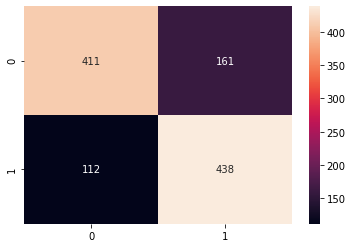

Accuracy : 0.7566844919786097


In [97]:
y_pred_ens = y_pred_knn + y_pred_rfc + y_pred_gnb

y_pred_ens = [1 if (i >= 2) else 0 for i in y_pred_ens]

cm = confusion_matrix(y_test, y_pred_ens)
print("Ensemble")
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()
print("Accuracy : " + str((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])))

Ensemble Hard Vote


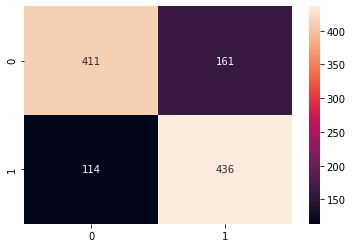

Accuracy : 0.7549019607843137


In [98]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('knn', knn), ('rf', rfc), ('gnb', gnb)], voting='hard')
eclf1.fit(x_train, y_train)
y_pred_ens1 = eclf1.predict(x_test)
cm = confusion_matrix(y_test, y_pred_ens1)
print("Ensemble Hard Vote")
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()
print("Accuracy : " + str((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])))

Ensemble Soft Vote


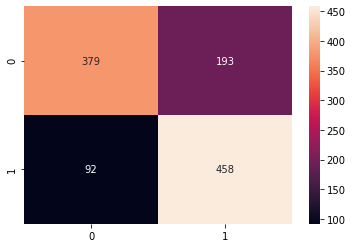

Accuracy : 0.7459893048128342


In [99]:
eclf2 = VotingClassifier(estimators=[('knn', knn), ('rf', rfc), ('gnb', gnb)], voting='soft')
eclf2.fit(x_train, y_train)
y_pred_ens2 = eclf2.predict(x_test)
cm = confusion_matrix(y_test, y_pred_ens2)
print("Ensemble Soft Vote")
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()
print("Accuracy : " + str((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])))

In [100]:
print("\t\tOur Method")
print("---------------------------------------------")
print("\n")
print("Accuracy: " + str(metrics.accuracy_score(y_test,y_pred_ens)))
print("Precision churn: " + str(metrics.precision_score(y_test,y_pred_ens)))
print("Precision no-churn: " + str(metrics.precision_score(y_test,y_pred_ens,pos_label=0)))
print("Recall: " + str(metrics.recall_score(y_test,y_pred_ens)))
print("F1 score: " + str(metrics.f1_score(y_test,y_pred_ens)))
print("AUC score: " + str(metrics.roc_auc_score(y_test,y_pred_ens)))
print("\n")
print(metrics.classification_report(y_test,y_pred_ens))
print("\n\n")
print("\t\tHard Vote")
print("---------------------------------------------")
print("\n")
print("Accuracy: " + str(metrics.accuracy_score(y_test,y_pred_ens1)))
print("Precision churn: " + str(metrics.precision_score(y_test,y_pred_ens1)))
print("Precision no-churn: " + str(metrics.precision_score(y_test,y_pred_ens1,pos_label=0)))
print("Recall: " + str(metrics.recall_score(y_test,y_pred_ens1)))
print("F1 score: " + str(metrics.f1_score(y_test,y_pred_ens1)))
print("AUC score: " + str(metrics.roc_auc_score(y_test,y_pred_ens1)))
print("\n")
print(metrics.classification_report(y_test,y_pred_ens1))
print("\n\n")
print("\tSoft Vote")
print("---------------------------------------------")
print("\n")
print("Accuracy: " + str(metrics.accuracy_score(y_test,y_pred_ens2)))
print("Precision churn: " + str(metrics.precision_score(y_test,y_pred_ens2)))
print("Precision no-churn: " + str(metrics.precision_score(y_test,y_pred_ens2,pos_label=0)))
print("Recall: " + str(metrics.recall_score(y_test,y_pred_ens2)))
print("F1 score: " + str(metrics.f1_score(y_test,y_pred_ens2)))
print("AUC score: " + str(metrics.roc_auc_score(y_test,y_pred_ens2)))
print("\n")
print(metrics.classification_report(y_test,y_pred_ens2))

		Our Method
---------------------------------------------


Accuracy: 0.7566844919786097
Precision churn: 0.7312186978297162
Precision no-churn: 0.7858508604206501
Recall: 0.7963636363636364
F1 score: 0.7624020887728459
AUC score: 0.7574475524475524


              precision    recall  f1-score   support

           0       0.79      0.72      0.75       572
           1       0.73      0.80      0.76       550

    accuracy                           0.76      1122
   macro avg       0.76      0.76      0.76      1122
weighted avg       0.76      0.76      0.76      1122




		Hard Vote
---------------------------------------------


Accuracy: 0.7549019607843137
Precision churn: 0.7303182579564489
Precision no-churn: 0.7828571428571428
Recall: 0.7927272727272727
F1 score: 0.7602441150828247
AUC score: 0.7556293706293706


              precision    recall  f1-score   support

           0       0.78      0.72      0.75       572
           1       0.73      0.79      0.76       550

 

# Parameter Tuning
Optimizing parameters using GridSearchCV for KNN and Random Forest

In [101]:
from sklearn.model_selection import GridSearchCV
p = [{'n_neighbors':[i for i in range(3,30,2)], 'metric':['minkowski','manhattan','euclidean']}]


gs = GridSearchCV(estimator=knn,
                  param_grid=p,
                  scoring='accuracy',
                  cv=10)
grid_search = gs.fit(x_train, y_train)
print("Best Estimator:\n")
print(grid_search.best_estimator_)
print("\nBest Parameters:\n")
print(grid_search.best_params_)
print("\nBest Score: " + str(grid_search.best_score_))

Best Estimator:

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

Best Parameters:

{'metric': 'manhattan', 'n_neighbors': 15}

Best Score: 0.7175148430873621


In [102]:
p_rf = [{'n_estimators':[i for i in range(10,100,10)], 'criterion':['gini','entropy'] , 
                         'max_depth':[None,10,50,100,200]}]

gs = GridSearchCV(estimator=rfc,
                  param_grid=p_rf,
                  scoring='accuracy',
                  cv=10)
grid_search = gs.fit(x_train, y_train)
print("Best Estimator:\n")
print(grid_search.best_estimator_)
print("\nBest Parameters:\n")
print(grid_search.best_params_)
print("\nBest Score: " + str(grid_search.best_score_))

Best Estimator:

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Best Parameters:

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 60}

Best Score: 0.7545757655523382


# Conclusion

All classification methods performed similiar results. Unfortunately, our accuracy results are not high, around only %75. However, Random Forest algorithm gave us the best result. Gaussian Naive Bayes was close to the Random Forest, but Kth Nearest Neighbor performed worse than those two algorithms. Since our results do not have very high accuracy, there might be better algorithms to predict customer churn for this case.